In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [30]:
path = 'train'
df = pd.read_csv('train.csv')
n = len(df)
y = np.zeros(shape=(n,1),dtype=int)
X = np.zeros(shape=(n,32,32,3))

for i,v in df.iterrows():
    y[i] = v[1]
    X[i] = (mpimg.imread(f'{path}/{v[0]}'))/255

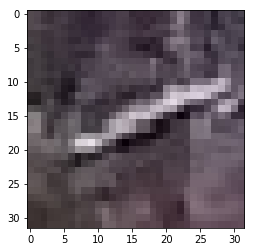

[1]


In [35]:
i = np.random.randint(len(X))
plt.imshow(X[i])
plt.show()
print(y[i])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

Using TensorFlow backend.


In [45]:
input_layer = Input(shape=(32,32,3))
x = Convolution2D(16, kernel_size=3,activation='relu')(input_layer)
x = MaxPooling2D()(x)
x = Convolution2D(32, kernel_size=3,activation='relu')(x)
x = Convolution2D(64, kernel_size=3,activation='relu')(x)
x = MaxPooling2D()(x)
x = Dense(256,activation='relu')(Flatten()(x))
x = Dropout(rate=0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
__________

In [46]:
model.fit(X_train,y_train,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
11725/11725 [==============================] - 13s 1ms/step - loss: 0.2244 - acc: 0.9045
Epoch 2/10
11725/11725 [==============================] - 12s 1ms/step - loss: 0.1201 - acc: 0.9546
Epoch 3/10
11725/11725 [==============================] - 12s 993us/step - loss: 0.0930 - acc: 0.9639
Epoch 4/10
11725/11725 [==============================] - 12s 983us/step - loss: 0.0833 - acc: 0.9686
Epoch 5/10
11725/11725 [==============================] - 11s 978us/step - loss: 0.0709 - acc: 0.9736
Epoch 6/10
11725/11725 [==============================] - 12s 1ms/step - loss: 0.0590 - acc: 0.9796
Epoch 7/10
11725/11725 [==============================] - 11s 977us/step - loss: 0.0495 - acc: 0.9826
Epoch 8/10
11725/11725 [==============================] - 12s 1ms/step - loss: 0.0463 - acc: 0.9826
Epoch 9/10
11725/11725 [==============================] - 12s 1000us/step - loss: 0.0334 - acc: 0.9876
Epoch 10/10
11725/11725 [================

In [48]:
model.evaluate(X_test,y_test)

5775/5775 [==============================] - 2s 367us/step


[0.0568907496833053, 0.9802597402597403]

In [53]:
tpath = 'test'
submit = pd.read_csv('sample_submission.csv')
t_X = np.zeros(shape=(len(submit),32,32,3))

for i,v in submit.iterrows():
    t_X[i] = (mpimg.imread(f'{tpath}/{v[0]}'))/255

In [54]:
t_y = model.predict(t_X)

In [58]:
submit['has_cactus'] = t_y
submit.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.999982
1,0017242f54ececa4512b4d7937d1e21e.jpg,1.000000
2,001ee6d8564003107853118ab87df407.jpg,0.002661
3,002e175c3c1e060769475f52182583d0.jpg,0.002253
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.980105


In [59]:
submit.to_csv('170419.csv')